In [11]:
using HDF5, PyPlot, Glob, CSV, DataFrames, Dates, Distributions, GLM, StatsBase, MAT, NaNStatistics

In [12]:
drv = "/mnt/a82d7171-92f9-48ad-9ba4-aea036c8fec8/data_storage/collabs/maya/oddball/silent_gap/"
outpath = drv*"output/"
file_list = glob("*mat",drv)
fps = 4
colors=[[241, 106, 5],[82, 121, 111],[165, 0, 43],[79, 53, 155]]./255
fs = 16
ymn = 300
ymx = 1270
xmn = 0
xmx = 600

600

In [13]:
file_list

5-element Vector{String}:
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 42 bytes ⋯ "ll/silent_gap/Stimuli_500ms.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 47 bytes ⋯ "lent_gap/idx_plane_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 53 bytes ⋯ "ap/pipeline_output_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 48 bytes ⋯ "ent_gap/raw_traces_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 46 bytes ⋯ "ilent_gap/stimtrain_0.5sISI.mat"

In [14]:
#1 ISI 
pnum = 3
rnum = 4
snum = 5
isi = Int.(0.5*fps)

2

In [15]:
pipeline_output = h5open(file_list[pnum],"r")
raw_traces = h5open(file_list[rnum],"r")

IJulia.clear_output()

0

In [16]:
keys(pipeline_output)

6-element Vector{String}:
 "#refs#"
 "DF"
 "ROI_centroids"
 "fish_ncells"
 "fish_numbers"
 "idx_fish"

In [17]:
centroids = pipeline_output["ROI_centroids"][]
idx_fish = pipeline_output["idx_fish"][]
IJulia.clear_output()

0

In [19]:
#framerate = read(file,"framerate")
file = matopen(file_list[snum],"r")
keys(file)
stimtrain = read(file,"stimtrain")

file = matopen(file_list[1],"r")
stim_reg = read(file,"Stimuli")[:,2]
#stimtimes = Int.(stimtimes)
#stim_seq = vec(read(file,"stim_seq"))
#stim_freqs = vec(read(file,"stim_freqs"))
IJulia.clear_output()

0

In [20]:
start_idx = findfirst(stim_reg .> 0)
n_frames = length(stim_reg)

976

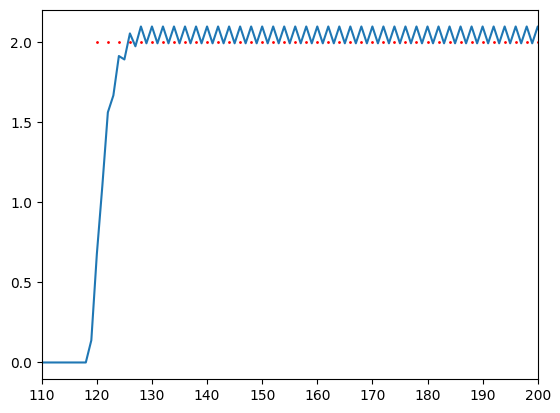

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/stednitz/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


(110.0, 200.0)

In [21]:
stimtimes = []

for f = start_idx:isi:n_frames
    append!(stimtimes,f)
end

plot(stim_reg)
scatter(stimtimes,zeros(length(stimtimes)).+2,s=1,color="red")
xlim(110,200)

In [22]:
keys(raw_traces)

1-element Vector{String}:
 "raw_traces"

In [23]:
DF = pipeline_output["DF"][]
raw = raw_traces["raw_traces"][]

150413×976 Matrix{Float32}:
 1601.58   1530.15   1578.57   1589.92   …  1400.56   1424.94   1412.74
 1649.44   1611.84   1778.71   1752.51      1608.27   1581.21   1580.29
 1583.21   1523.85   1578.48   1584.83      1396.81   1410.65   1400.89
 1785.96   1697.08   1814.1    1877.27      1780.91   1707.04   1733.15
 1562.93   1395.58   1510.11   1580.95      1372.76   1368.63   1346.6
 1313.28   1330.63   1323.14   1326.87   …  1252.55   1253.68   1263.11
 1607.44   1592.11   1661.82   1622.01      1511.21   1505.97   1497.69
 1428.95   1389.96   1439.72   1441.6       1382.43   1363.09   1383.98
 1643.03   1674.09   1766.25   1758.15      1538.98   1520.63   1537.86
 1464.96   1409.76   1467.25   1463.8       1370.62   1344.07   1343.32
 1455.15   1432.54   1452.51   1462.64   …  1372.6    1374.57   1370.78
 1487.88   1543.49   1539.38   1526.33      1459.27   1460.71   1460.45
 1490.91   1458.66   1473.05   1489.36      1376.93   1371.45   1368.76
    ⋮                                

In [27]:
## Compute z  scored F from raw traces
zscore = zeros(size(raw))

for r = 1:size(raw)[1]
    trace = raw[r,:]
    avg = nanmean(trace[60:end])
    stdev = nanstd(trace[60:end])
    if (!isnan(avg) == true) && (!isnan(stdev) == true)
        if stdev > 0
            zscore[r,:] .= (trace .- avg) ./ stdev
        else
            zscore[r,:] .= (trace .- avg)
        end
    end
end

DF = zscore

150413×976 Matrix{Float64}:
  1.63325     0.679517    1.3261    …  -1.05104     -0.725451   -0.88841
  0.933729    0.141874    3.65612       0.0667173   -0.503155   -0.522559
  1.25083     0.478246    1.18929      -1.17539     -0.995266   -1.12222
  0.800085   -0.307922    1.15084       0.737085    -0.183824    0.141679
  4.10535     0.0580755   2.82804      -0.493724    -0.593644   -1.12636
  0.714219    1.20129     0.990999  …  -0.991085    -0.959172   -0.694449
  1.73918     1.37151     3.04367      -0.568946    -0.694771   -0.893337
  0.872543   -0.152616    1.15559      -0.350518    -0.858989   -0.309988
  0.131541    0.516527    1.65891      -1.15808     -1.38558    -1.17203
  4.27068     1.67031     4.37836      -0.173712    -1.42452    -1.45998
  1.29801     0.700029    1.22836   …  -0.885128    -0.832976   -0.933268
  0.723891    3.1749      2.9937       -0.536715    -0.473289   -0.484747
  2.28029     1.2603      1.71538      -1.32402     -1.49747    -1.58248
  ⋮             

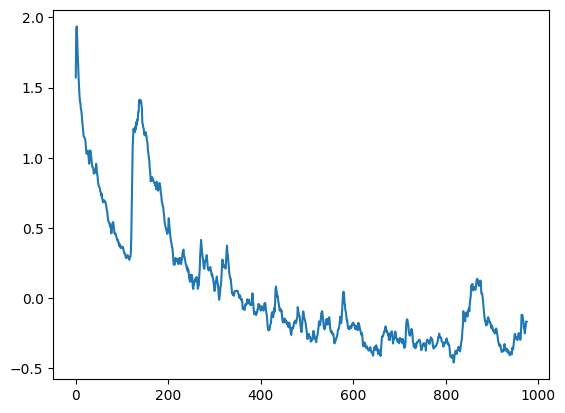

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0de9731400>

In [28]:
plot(vec(mean(DF,dims=1)))

In [29]:
n_frames = length(DF[1,:])
total_rois = length(DF[:,1])

150413

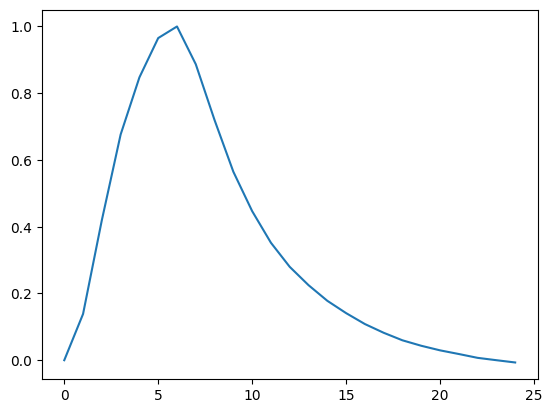

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0de9718278>

In [30]:
spike=[0,1.69644104899772,5.13796058542217,8.27886020152244,10.3756715204800,11.8173714529814,12.2425184714093,10.8571417354877,8.80831829681196,6.91339112244670,5.46959264663869,4.30868766622567,3.42533619066766,2.75378443486879,2.18017250852183,1.72816235135824,1.32732537295463,1.00684435500268,0.730210038304555,0.530242444093118,0.362253250339685,0.227668255288566,0.0869242416152502,0.000718266708050853,-0.0828334873368325]';
spike = vec(spike./maximum(spike))
plot(spike)

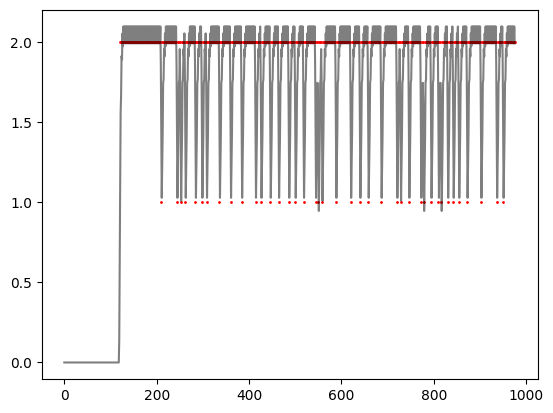

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0de0f38240>

In [32]:
scatter(stimtimes,stimtrain[1:end-1].+1,s=1,color="red")

gap_times = []
noise_times = []
for i = 1:length(stimtimes)
    curr_stim = stimtrain[i]
    if curr_stim == 0
        append!(gap_times,stimtimes[i])
    elseif curr_stim == 1
        append!(noise_times,stimtimes[i])
    end
end

gap_times = Int.(gap_times)
noise_times = Int.(noise_times)

n_gap = length(stimtrain[stimtrain .== 0])
randtimes = Int.(sample(start_idx:isi*2:n_frames,n_gap,replace=false))

r1 = collect(start_idx:isi*2:n_frames)
filter!(r1->r1∉gap_times,r1)

gap_offset = sort(sample(r1, n_gap, replace=false))
after_gap_times = Int.(gap_times .+ isi)

plot(stim_reg,color="black",alpha=0.5)

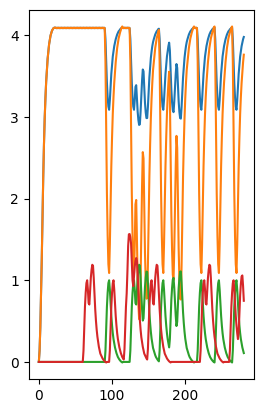

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0de0e92e80>

In [33]:
#number of frames to offset oddball
offset = 24

function compute_calcium(times)
    reg = zeros((n_frames))
    for stim in times
        nd = stim + length(spike)
        off = 0
        if length(reg) < stim+length(spike) 
            off = nd - length(reg)
            nd = length(reg)
        end
        reg[stim:nd-1] .+= spike[1:end-off]
    end
    return reg
end

auditory_reg = compute_calcium(noise_times)
gap_reg = compute_calcium(gap_times)
after_gap_reg = compute_calcium(after_gap_times)
gap_offset_reg = compute_calcium(gap_offset)
random_reg = compute_calcium(randtimes)
post_gap_bump_reg = auditory_reg .+ after_gap_reg
suppression_reg = auditory_reg .- (gap_reg*2)

subplot(121)
rng = 120:400
plot(auditory_reg[rng])
plot(suppression_reg[rng])
plot(gap_reg[rng])
plot(gap_offset_reg[rng])
#plot(after_gap_reg[rng])

In [34]:
exp_regs = [stim_reg,gap_reg,gap_offset_reg,random_reg,after_gap_reg,suppression_reg]
reg_titles = ["auditory","gap","gap_offset","random","after_gap","suppression"]

6-element Vector{String}:
 "auditory"
 "gap"
 "gap_offset"
 "random"
 "after_gap"
 "suppression"

## Compute regression

In [31]:
coeffs = Array{Float32}(undef,length(exp_regs),total_rois); fill!(coeffs,NaN)
r2s = Array{Float32}(undef,length(exp_regs),total_rois); fill!(r2s,NaN)
pvals = Array{Float32}(undef,length(exp_regs),total_rois); fill!(pvals,NaN)

t = now()
print("starting $t ...")
for i = 1:total_rois
    reg_ctr = 1
    yr = DF[i,start_idx:end]
    for r = 1:length(exp_regs)
        t = now()
        xr = exp_regs[r][start_idx:end]
        df = DataFrame([yr,xr],["y","x"])
        ols = lm(@formula(y ~ x),df)
        r2s[reg_ctr,i] = r2(ols)
        coeffs[reg_ctr,i] = coef(ols)[2]
        pvals[reg_ctr,i] = coeftable(ols).cols[4][2]
        reg_ctr +=1
    end
end

t = now()
print("...complete $t")

starting 2024-03-07T17:27:17.603 ......complete 2024-03-07T17:28:36.162

### Save regression

In [32]:
short_id = file_list[pnum][length(drv)+17:end-4]
short_id = "gap_500msISI"
outfile = outpath*short_id*".h5"
if isfile(outfile) rm(outfile) end
of = h5open(outfile,"w")

for r=1:length(reg_titles)
    create_group(of,reg_titles[r])
    of[reg_titles[r]]["reg"] = exp_regs[r]
    of[reg_titles[r]]["r2"] = r2s[r,:]
    of[reg_titles[r]]["coef"] = coeffs[r,:]
    of[reg_titles[r]]["pval"] = pvals[r,:]
end

close(of)

In [35]:
total_rois = length(DF[:,1])

150413

## Read existing data

In [36]:
short_id = file_list[pnum][length(drv)+17:end-4]
short_id = "gap_500msISI"

outfile = outpath*short_id*".h5"

of = h5open(outfile,"r")
coeffs = Array{Float32}(undef,length(reg_titles),total_rois); fill!(coeffs,NaN)
r2s = Array{Float32}(undef,length(reg_titles),total_rois); fill!(r2s,NaN)
pvals = Array{Float32}(undef,length(reg_titles),total_rois); fill!(pvals,NaN)
exp_regs = zeros((length(reg_titles),n_frames))
sig_rois = Array{Int64}[]
nonsig_rois = Array{Int64}[]

for r=1:6#length(exp_regs)
    #exp_regs[r] = of[reg_titles[r]]["reg"][]
    #temp = of[reg_titles[r]]["r2"][]
    r2s[r,:] .= of[reg_titles[r]]["r2"][]
    coeffs[r,:] .= of[reg_titles[r]]["coef"][]
    pvals[r,:] .= of[reg_titles[r]]["pval"][]
    #push!(sig_rois, of[reg_titles[r]]["sig_rois"][])
    #push!(nonsig_rois, of[reg_titles[r]]["nonsig_rois"][])
end
close(of)

## Compute significant ROIs

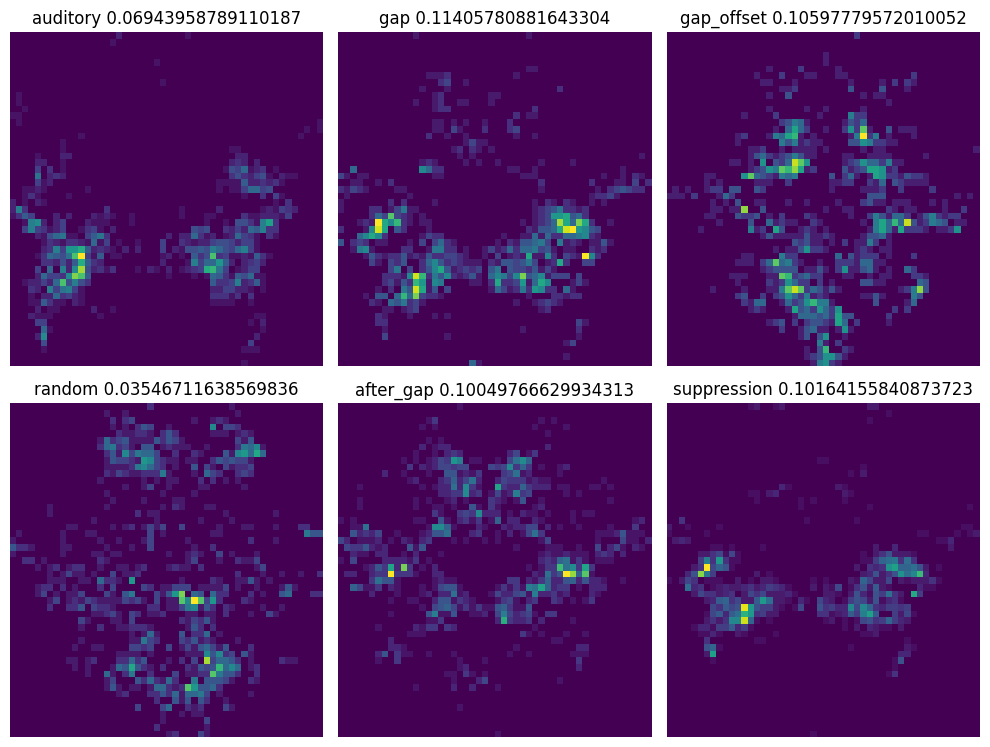

In [37]:
sig_rois = Array{Int64}[]
nonsig_rois = Array{Int64}[]

figure(figsize=(10,15)); 
rows,cols=4,3
alpha_cutoff = 0.05/total_rois
perc_cutoff = 99
#minimum_r2 = 0.05#0.1
for r=1:6#length(exp_regs)
    pvals_clean = pvals[r,:]
    sig_roi_pval = findall(pvals_clean .< alpha_cutoff); idx_rest_pval = findall(pvals_clean .>= alpha_cutoff)
    
    r2s_clean = replace(r2s[r,:],NaN=>0)
    perc_99 = percentile(r2s_clean,perc_cutoff)
    #if perc_99 < 0.1 perc_99 = minimum_r2 end
    sig_roi_r2 = findall(r2s_clean .> perc_99); idx_rest_r2 = findall(r2s_clean .<= percentile(r2s_clean,perc_99))
    
    sig_roi = intersect(sig_roi_pval,sig_roi_r2)
    nonsig_roi = collect(1:total_rois)
    deleteat!(nonsig_roi,sig_roi[1])
    
    push!(sig_rois,sig_roi)
    push!(nonsig_rois,nonsig_roi)
    subplot(rows,cols,r)
    title(reg_titles[r]*" $perc_99")
    plt.hist2d(centroids[sig_roi,2],centroids[sig_roi,1],bins=50); axis("off");
end

tight_layout()

In [31]:
idx = findall(coeffs[2,:] .< 0)
r2s[2,idx] .= 0

127994-element view(::Matrix{Float32}, 2, [2, 4, 5, 6, 7, 8, 9, 10, 12, 13  …  150401, 150404, 150405, 150406, 150407, 150408, 150409, 150410, 150411, 150413]) with eltype Float32:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [38]:
n_fish = length(unique(idx_fish))

9

## Figure 4B

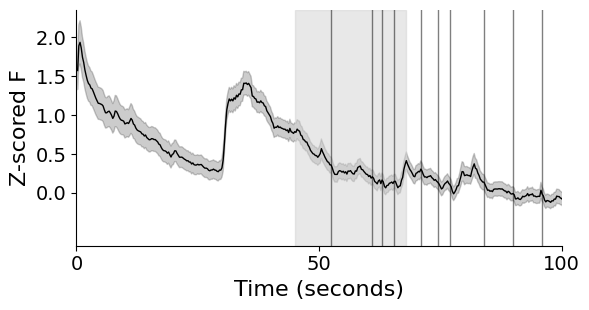

In [39]:
rows,cols = 1,1
figure(figsize=(cols*6,rows*3.2))
ax = subplot(111)


n_fish = length(unique(idx_fish))
ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
ctr = 1
subplot(rows,cols,ctr)
avg = vec(mean(DF,dims=1))
stdev = vec(std(DF,dims=1))./n_fish
fill_between(x, avg.-stdev, avg.+stdev,color="black",alpha=0.2)
plot(x,avg,color="black",linewidth=1)
ctr+=1

ax.set_ylabel("Z-scored F",fontsize=fs)
ax.set_yticks([0,0.5,1,1.5,2])

ctr = 1

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
for ob in gap_times
    ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.5)
end

ax.axvspan(45, 68, alpha=0.5, color="lightgray")

xlim(0,100)

xticks([0,50,100],[0,50,100,],fontsize=14)
yticks([0,0.5,1,1.5,2.0],[0,0.5,1,1.5,2.0],fontsize=14)

xlabel("Time (seconds)",fontsize=fs)
tight_layout()

tight_layout()


#PyPlot.plt.subplots_adjust(wspace=0.2,hspace=0)

plt.savefig("figs/Fig4D.svg",dpi=300)

# Figure 4C

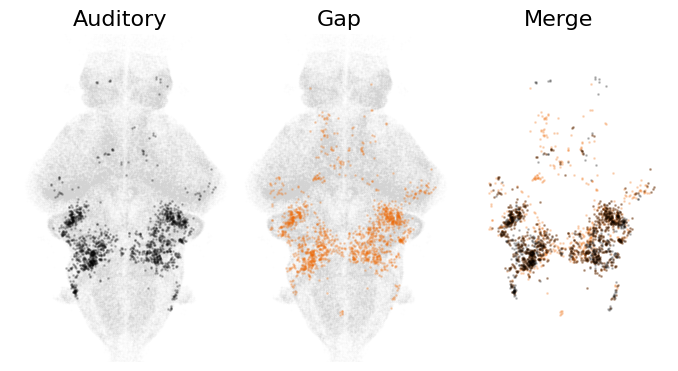

In [40]:
figure(figsize=(8.5,4.25)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

a = 0.2


nsa = 0.002

ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end

PyPlot.plt.subplots_adjust(wspace=0,hspace=0)

savefig("figs/Fig4E.png",dpi=300)

## Figure 4D

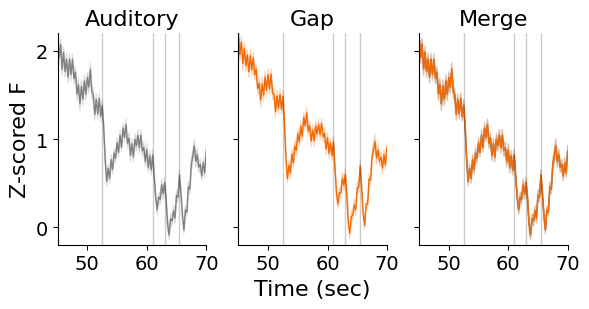

In [42]:

figure(figsize=(6,3.2))
ax1 = subplot(131); title("Auditory",fontsize=fs)
ax2 = subplot(132); title("Gap",fontsize=fs)
ax3 = subplot(133); title("Merge",fontsize=fs)

ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
axes = [ax1,ax2,ax3]
ctr = 1
for r in [2,6]
    subplot(1,3,ctr)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end

ctr = 1
for r in [2,6]
    sr = sig_rois[2,:][1]
    sr2 = sig_rois[6,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end

ax1.set_ylabel("Z-scored F",fontsize=fs)
ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0,1,2,3],fontsize=14)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel("Time (sec)",fontsize=fs)

ax2.set_yticklabels(["","","",""])
ax3.set_yticks([0,1,2,3])
ax3.set_yticklabels(["","","",""])

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_xlim(45, 68)
    ax.set_ylim(-0.2,2.2)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    for ob in gap_times
        ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
    end
    ax.set_xticks([50,60,70])
    ax.set_xticklabels([50,60,70],fontsize=14)
end

tight_layout()

savefig("figs/Fig4F.svg",dpi=600)

In [156]:
function decay_plot(s,st)
    c2 = 1
    ctr = 1
    totals = zeros((n_fish,length(st)))
    avgs = zeros(length(st))
    
    for fish in unique(idx_fish)
        valid_idx = findall(idx_fish[1,:] .== fish)
        sr = sig_rois[s,:][1]
        sr = intersect(sr,valid_idx)
        avgs = zeros(length(st))
        c2 = 0
        for stim in st
            roi_avgs = []
            for roi in sr
                y = (DF[roi,stim:stim+isi])
                y = y[2:end] .- y[1]
                avg = mean(y)
                if isfinite(avg) == true
                    push!(roi_avgs,avg)
                end
            end
            c2 +=1
            if length(roi_avgs) > 0
                avg = nnmean(roi_avgs)
            else
                avg = NaN
            end
            avgs[c2] = avg
            totals[ctr,c2] = avg
        end
        ctr+=1
    end
    avg = vec(nnmean(totals,1))
    errs = vec(nnstd(totals,1))./n_fish
    return avg,totals,errs
end

nnmean(x) = mean(filter(!isnan,x))
nnmean(x,y) = mapslices(nnmean,x,dims=y)

nnstd(x) = std(filter(!isnan,x))
nnstd(x,y) = mapslices(nnstd,x,dims=y)

nnstd (generic function with 2 methods)

In [76]:
repetitions_before_gap = [(210-120)/isi]

for g = 2:length(gap_times)
    repeats = gap_times[g] - gap_times[g-1]
    append!(repetitions_before_gap, repeats)
end

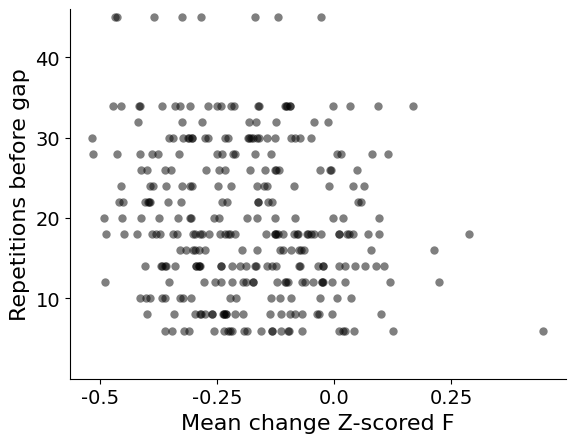

In [159]:
vec_avg = []
vec_repeats = []

ax = subplot(111)
good_idx = isfinite.(totals)

for f = 1:9
    avg = totals[f,:]
    if sum(isfinite.(avg)) == 40
        scatter(avg,repetitions_before_gap,color="black",alpha=0.5,linewidth=0,lw=0)
        append!(vec_avg,avg); append!(vec_repeats,repetitions_before_gap)
    end
end

ax.set_ylim(0,46)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

ax.set_xticks([-.5,-.25,0,0.25])
ax.set_xticklabels([-.5,-.25,0,0.25],fontsize=14)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([10,20,30,40],fontsize=14)
ylabel("Repetitions before gap",fontsize=16)
xlabel("Mean change Z-scored F",fontsize=16)

savefig("figs/FigS2X_gap_repetitions.svg",dpi=300)

In [149]:
using GLM

df = DataFrame([Vector{Float64}(vec_avg),Vector{Float64}(vec_repeats)],["y","x"])
ols = lm(@formula(y ~ x),df)
r2s = round(r2(ols),sigdigits=3)
pval = coeftable(ols).cols[4][2]

0.004023685355266726

In [150]:
r2s

0.0257

In [151]:
ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.133518   0.0205191    -6.51    <1e-09  -0.173888    -0.0931475
x            -0.0027347  0.000943845  -2.90    0.0040  -0.00459167  -0.000877736
────────────────────────────────────────────────────────────────────────────────

## Figure 4E

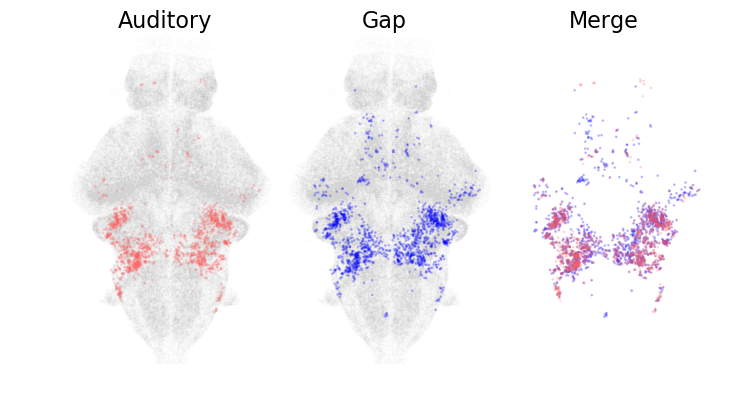

In [113]:
figure(figsize=(8.5,4.25)); 

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

a = 0.2

nsa = 0.002
vm = 0.5

ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],c="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],c="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end

PyPlot.plt.subplots_adjust(wspace=0,hspace=0)

savefig("figs/Fig4E.png",dpi=300)

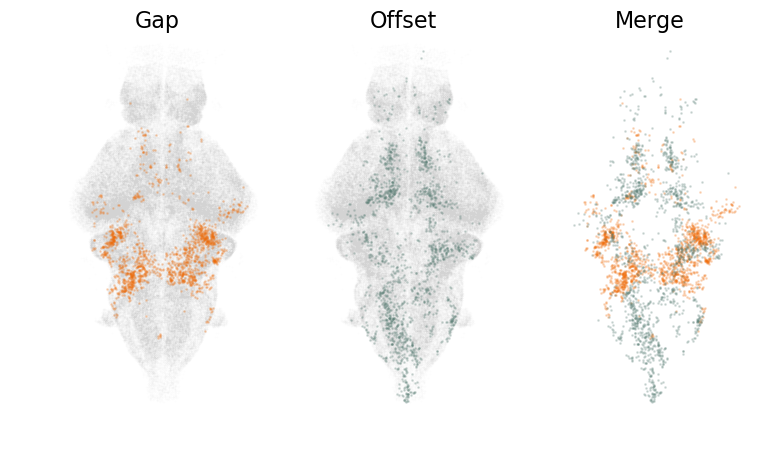

In [101]:
figure(figsize=(8.5,4.5)); 

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[3,:][1]
sr2 = sig_rois[3,:][1]

titles = ["Gap","Offset","Merge"]

figure(figsize=(9,5)); 
a = 0.2

nsa = 0.002

ax1 = subplot(131); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)

ax2 = subplot(132); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],color=colors[2],s=1,alpha=a)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)
scatter(centroids[sr2,2],centroids[sr2,1],color=colors[2],s=1,alpha=a)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end